In [1]:
from large_gcs.contact.contact_location import *
from large_gcs.contact.contact_pair_mode import *
from large_gcs.contact.rigid_body import *
from large_gcs.geometry.polyhedron import Polyhedron
from large_gcs.graph.contact_graph import ContactGraph
from large_gcs.algorithms.gcs_astar import GcsAstar
from large_gcs.graph.contact_cost_constraint_factory import (
    contact_shortcut_edge_cost_factory,
)
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
from IPython.display import HTML


np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})

In [2]:
file_name = "contact_graph_triangle_challenge_full.npy"
file_name = "contact_graph_triangle_challenge_sol_only.npy"
graph_file = os.path.join(
    os.environ["PROJECT_ROOT"], "large_gcs", "example_graphs", file_name
)

In [3]:
# # # 3 items triangle challenge
# obs_vertices = [[[-1, 2], [-1, -1], [2, 2]]]
# obj_vertices = [[[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]]]
# rob_vertices = [[[3, 1], [3, 0], [3.5, 0]]]
# source_obj_pos = [[1.5, 0.5]]
# source_rob_pos = [[3.25, 0]]
# target_obj_pos = [[-1.5, 0]]
# target_rob_pos = [[-3, 0]]

# obs = []
# objs = []
# robs = []
# n_pos_per_set = 2
# for i in range(len(obs_vertices)):
#     obs.append(
#         RigidBody(
#             name=f"obs{i}",
#             geometry=Polyhedron.from_vertices(obs_vertices[i]),
#             mobility_type=MobilityType.STATIC,
#             n_pos_points=n_pos_per_set,
#         )
#     )
# for i in range(len(obj_vertices)):
#     objs.append(
#         RigidBody(
#             name=f"obj{i}",
#             geometry=Polyhedron.from_vertices(obj_vertices[i]),
#             mobility_type=MobilityType.UNACTUATED,
#             n_pos_points=n_pos_per_set,
#         )
#     )
# for i in range(len(rob_vertices)):
#     robs.append(
#         RigidBody(
#             name=f"rob{i}",
#             geometry=Polyhedron.from_vertices(rob_vertices[i]),
#             mobility_type=MobilityType.ACTUATED,
#             n_pos_points=n_pos_per_set,
#         )
#     )
# all_rigid_bodies = obs + objs + robs

# # for rigid_body in all_rigid_bodies:
# #     rigid_body.plot()
# for static_body in obs:
#     static_body.plot()
# for movable_body, source_pos in zip(objs + robs, source_obj_pos + source_rob_pos):
#     movable_body.plot_at_position(source_pos, color="red")
# for movable_body, target_pos in zip(objs + robs, target_obj_pos + target_rob_pos):
#     movable_body.plot_at_position(target_pos, color="lightgreen")
# plt.gca().set_aspect("equal")

# robs[0].plot()
# obs[0].plot()
# objs[0].plot()

# ws_x = 4
# ws_y = 3
# vertex_inclusion = [
#     "source",
#     "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f1-rob0_f1')",
#     "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')",
#     "('IC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')",
#     "('IC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f0-rob0_v1')",
#     "('IC|obs0_f2-obj0_f1', 'NC|obs0_f2-rob0_v0', 'IC|obj0_f0-rob0_v1')",
#     "('IC|obs0_f2-obj0_f1', 'NC|obs0_f2-rob0_v0', 'NC|obj0_f0-rob0_v1')",
#     "('IC|obs0_f2-obj0_f1', 'NC|obs0_f2-rob0_v0', 'NC|obj0_f3-rob0_v0')",
#     "target",
# ]
# contact_graph = ContactGraph(
#     obs,
#     objs,
#     robs,
#     source_obj_pos,
#     source_rob_pos,
#     target_obj_pos,
#     target_rob_pos,
#     workspace=[[-ws_x, ws_x], [-ws_y, ws_y]],
#     vertex_exclusion=None,
#     vertex_inclusion=vertex_inclusion,
# )

# print(contact_graph.params)
# # Serialize and save to disk
# contact_graph.save_to_file(graph_file)

In [4]:
cg = ContactGraph.load_from_file(graph_file)
print(cg.params)

Generating contact sets for 3 bodies...
Generating contact pair modes for 3 body pairs...


100%|██████████| 3/3 [00:00<00:00, 79.76it/s]


Each body pair has on average 6.666666666666667 modes
Generating contact sets for 216 sets...


100%|██████████| 216/216 [00:00<00:00, 697.81it/s]


Pruning empty sets...


100%|██████████| 216/216 [00:01<00:00, 111.64it/s]


179 sets remain after removing 37 empty sets
Filtering sets for inclusion strings ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f1-rob0_f1')", "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f0-rob0_v1')", "('IC|obs0_f2-obj0_f1', 'NC|obs0_f2-rob0_v0', 'IC|obj0_f0-rob0_v1')", "('IC|obs0_f2-obj0_f1', 'NC|obs0_f2-rob0_v0', 'NC|obj0_f0-rob0_v1')", "('IC|obs0_f2-obj0_f1', 'NC|obs0_f2-rob0_v0', 'NC|obj0_f3-rob0_v0')", 'target']


100%|██████████| 179/179 [00:00<00:00, 36528.99it/s]


7 sets remain after filtering for inclusion sets
Adding 9 vertices to graph...


9it [00:00, 8344.11it/s]


Adding 26 edges to graph...


26it [00:00, 4361.90it/s]

GraphParams(dim_bounds=(4, 18), n_vertices=9, n_edges=26, source=[[1.5, 0.5], [3.25, 0]], target=[[-1.5, 0], [-3, 0]], workspace=[[-4, 4], [-3, 3]], default_costs_constraints=None)


In [5]:
gcs_astar = GcsAstar(cg, contact_shortcut_edge_cost_factory)
sol = gcs_astar.run(verbose=True, animate=False)


AlgMetrics(n_vertices_visited=2, n_edges_visited=0, vertex_coverage=0.22, edge_coverage=0.0, n_gcs_solves=0, gcs_solve_time_total=0.0, gcs_solve_time_iter_mean=0.0, gcs_solve_time_iter_std=0.0, gcs_solve_time_iter_min=inf, gcs_solve_time_iter_max=0.0)
now exploring node source's neighbors

AlgMetrics(n_vertices_visited=3, n_edges_visited=2, vertex_coverage=0.33, edge_coverage=0.08, n_gcs_solves=1, gcs_solve_time_total=0.008636042941361666, gcs_solve_time_iter_mean=0.008636042941361666, gcs_solve_time_iter_std=0.0, gcs_solve_time_iter_min=0.008636042941361666, gcs_solve_time_iter_max=0.008636042941361666)
now exploring node ('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f1-rob0_f1')'s neighbors
edge ('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f1-rob0_f1') -> ('IC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1') not actually feasible
edge ('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f1-rob0_f1') -> ('IC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'NC|o

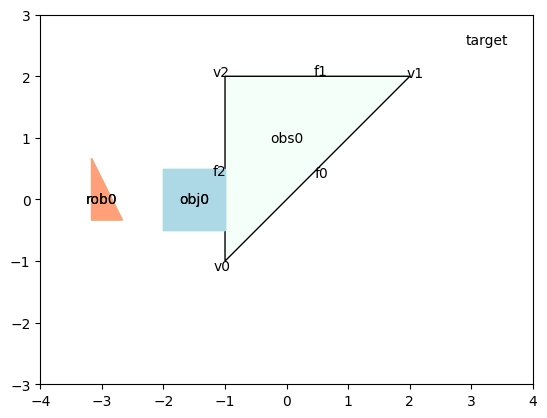

In [6]:
cg._post_solve(sol)
anim = cg.animate_solution()
HTML(anim.to_html5_video())